# Lute Data Exploration

Exploring the RateYourMusic album metadata extracted from Lute.

**Data source:** `data/raw/metadata/albums.parquet`  
**Schema:**
- `file_name` — RYM album ID
- `name` — Album title
- `artists` — List of artist dicts
- `rating` / `rating_count` — RYM ratings
- `primary_genres` / `secondary_genres` — Genre tags
- `descriptors` — Audio descriptors (melancholic, atmospheric, etc.)
- `tracks` — Track listing
- `release_date`, `spotify_id`, etc.


In [6]:
import pandas as pd
import numpy as np
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Style configuration — dark theme with vibrant accents
plt.style.use('dark_background')
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 11,
    'axes.facecolor': '#0d1117',
    'axes.edgecolor': '#30363d',
    'axes.labelcolor': '#c9d1d9',
    'axes.grid': True,
    'axes.axisbelow': True,
    'grid.color': '#21262d',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'figure.facecolor': '#0d1117',
    'figure.edgecolor': '#0d1117',
    'xtick.color': '#8b949e',
    'ytick.color': '#8b949e',
    'text.color': '#c9d1d9',
    'legend.facecolor': '#161b22',
    'legend.edgecolor': '#30363d',
})

# Color palette — vibrant neon
COLORS = {
    'primary': '#58a6ff',     # bright blue
    'secondary': '#f78166',   # coral
    'accent1': '#7ee787',     # green
    'accent2': '#d2a8ff',     # purple
    'accent3': '#ffa657',     # orange
    'muted': '#8b949e',       # gray
}

# Data path
DATA_PATH = Path('~/data/nvme/eno/raw/metadata/albums.parquet').expanduser()
print(f"Loading data from: {DATA_PATH.resolve()}")


Loading data from: /home/jovyan/data/nvme/eno/raw/metadata/albums.parquet


## 1. Load & Inspect Data


In [7]:
df = pd.read_parquet(DATA_PATH)
print(f"Total albums: {len(df):,}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


Total albums: 325,890

Columns: ['name', 'file_name', 'rating', 'rating_count', 'artists', 'primary_genres', 'secondary_genres', 'descriptors', 'tracks', 'release_date', 'languages', 'cover_image_url', 'duplicate_of', 'duplicates', 'spotify_id', 'credits']

Memory usage: 443.7 MB


In [8]:
# Data types
df.dtypes


name                 object
file_name            object
rating              float64
rating_count          int64
artists              object
primary_genres       object
secondary_genres     object
descriptors          object
tracks               object
release_date         object
languages            object
cover_image_url      object
duplicate_of         object
duplicates           object
spotify_id           object
credits              object
dtype: object

In [9]:
# Sample records
df.head(3)


,name,file_name,rating,rating_count,artists,primary_genres,secondary_genres,descriptors,tracks,release_date,languages,cover_image_url,duplicate_of,duplicates,spotify_id,credits
0,Γκάλοπ,release/album/%CE%BB%CE%B5%CE%BD%CE%B1-%CF%80%...,3.62,620,"[{'file_name': 'artist/λενα-πλατωνος', 'name':...","[Synthpop, Art Pop]","[Minimal Synth, Spoken Word]","[poetic, atmospheric, female vocals, hypnotic,...","[{'duration_seconds': None, 'name': 'Μια άσκησ...",2015-03-24,[Greek],https://e.snmc.io/i/600/w/ed940dacd341cddc2099...,release/album/λενα-πλατωνος/γκαλοπ-1,[],3pTWwaomgSxu3Ncu8MWhfG,[]
1,Вижу Землю,release/album/%D0%B3%D1%83%D0%BD%D0%B5%D1%88/%...,3.61,328,"[{'file_name': 'artist/гунеш', 'name': 'Гунеш ...","[Jazz Fusion, Jazz-Rock]","[Avant-Prog, Turkmen Music, Jazz-Funk]","[rhythmic, ensemble, psychedelic, space, progr...","[{'duration_seconds': None, 'name': 'Байконур'...",None,[],https://e.snmc.io/i/600/w/e35cc55aae4fc1a1b4ce...,release/album/гунеш/вижу-землю,[],6xEAm7utz6ugcHtJQ1lNfG,[]
2,Вечное,release/album/%D1%80%D0%BE%D0%B6%D1%8C/%D0%B2%...,3.53,330,"[{'file_name': 'artist/рожь', 'name': 'RYE'}]",[Atmospheric Black Metal],"[Post-Metal, Dark Folk, Funeral Doom Metal]","[atmospheric, female vocals, dense, energetic,...","[{'duration_seconds': None, 'name': 'Чертовщин...",2021-09-20,[Russian],https://e.snmc.io/i/600/w/72f12c5b47fe4d367d0a...,release/album/рожь/вечное,[],1OgbLIdB3Gnl3piT712h2g,[]


In [12]:
# Inspect a single album in detail
sample = df.iloc[0]
print(f"Album: {sample['name']}")
print(f"File name: {sample['file_name']}")
print(f"Rating: {sample['rating']:.2f} ({sample['rating_count']:,} ratings)")
print(f"Primary genres: {sample['primary_genres']}")
print(f"Secondary genres: {sample['secondary_genres']}")
print(f"Descriptors: {sample['descriptors'][:10]}...")  # first 10
print(f"Artists: {sample['artists']}")
print(f"Tracks: {len(sample['tracks'])} tracks")
if len(sample['tracks']) > 0:
    print(f"  First track: {sample['tracks'][0]}")


Album: Γκάλοπ
File name: release/album/%CE%BB%CE%B5%CE%BD%CE%B1-%CF%80%CE%BB%CE%B1%CF%84%CF%89%CE%BD%CE%BF%CF%82/%CE%B3%CE%BA%CE%B1%CE%BB%CE%BF%CF%80-1
Rating: 3.62 (620 ratings)
Primary genres: ['Synthpop' 'Art Pop']
Secondary genres: ['Minimal Synth' 'Spoken Word']
Descriptors: ['poetic' 'atmospheric' 'female vocals' 'hypnotic' 'mechanical' 'ethereal'
 'dense' 'minimalistic' 'cold']...
Artists: [{'file_name': 'artist/λενα-πλατωνος', 'name': 'Λένα Πλάτωνος [Lena Platonos]'}]
Tracks: 11 tracks
  First track: {'duration_seconds': None, 'name': 'Μια άσκηση Φυσικής άλυτη', 'position': 'A1', 'rating': None}


## 2. Basic Statistics


In [13]:
# Calculate label counts per album
df['n_primary_genres'] = df['primary_genres'].apply(len)
df['n_secondary_genres'] = df['secondary_genres'].apply(len)
df['n_descriptors'] = df['descriptors'].apply(len)
df['n_tracks'] = df['tracks'].apply(len)
df['n_artists'] = df['artists'].apply(len)
df['total_labels'] = df['n_primary_genres'] + df['n_secondary_genres'] + df['n_descriptors']

# Summary statistics
stats_cols = ['rating', 'rating_count', 'n_primary_genres', 'n_secondary_genres', 'n_descriptors', 'n_tracks', 'total_labels']
df[stats_cols].describe().round(2)


,rating,rating_count,n_primary_genres,n_secondary_genres,n_descriptors,n_tracks,total_labels
count,325890.00,325890.00,325890.00,325890.00,325890.00,325890.00,325890.00
mean,3.31,297.59,1.42,1.00,3.25,2.09,5.66
std,0.49,1754.95,0.91,1.38,5.56,6.36,6.77
min,0.50,1.00,0.00,0.00,0.00,0.00,0.00
25%,3.09,4.00,1.00,0.00,0.00,0.00,1.00
50%,3.37,20.00,1.00,0.00,0.00,0.00,3.00
75%,3.57,111.00,2.00,2.00,5.00,0.00,8.00
max,5.00,113005.00,10.00,74.00,60.00,601.00,105.00


In [14]:
# Data completeness
print("Data Completeness:")
print(f"  Albums with ratings: {(df['rating'] > 0).sum():,} ({(df['rating'] > 0).mean()*100:.1f}%)")
print(f"  Albums with genres: {(df['n_primary_genres'] > 0).sum():,} ({(df['n_primary_genres'] > 0).mean()*100:.1f}%)")
print(f"  Albums with descriptors: {(df['n_descriptors'] > 0).sum():,} ({(df['n_descriptors'] > 0).mean()*100:.1f}%)")
print(f"  Albums with tracks: {(df['n_tracks'] > 0).sum():,} ({(df['n_tracks'] > 0).mean()*100:.1f}%)")
print(f"  Albums with spotify_id: {df['spotify_id'].notna().sum():,} ({df['spotify_id'].notna().mean()*100:.1f}%)")


Data Completeness:
  Albums with ratings: 325,890 (100.0%)
  Albums with genres: 275,312 (84.5%)
  Albums with descriptors: 137,192 (42.1%)
  Albums with tracks: 63,794 (19.6%)
  Albums with spotify_id: 141,047 (43.3%)


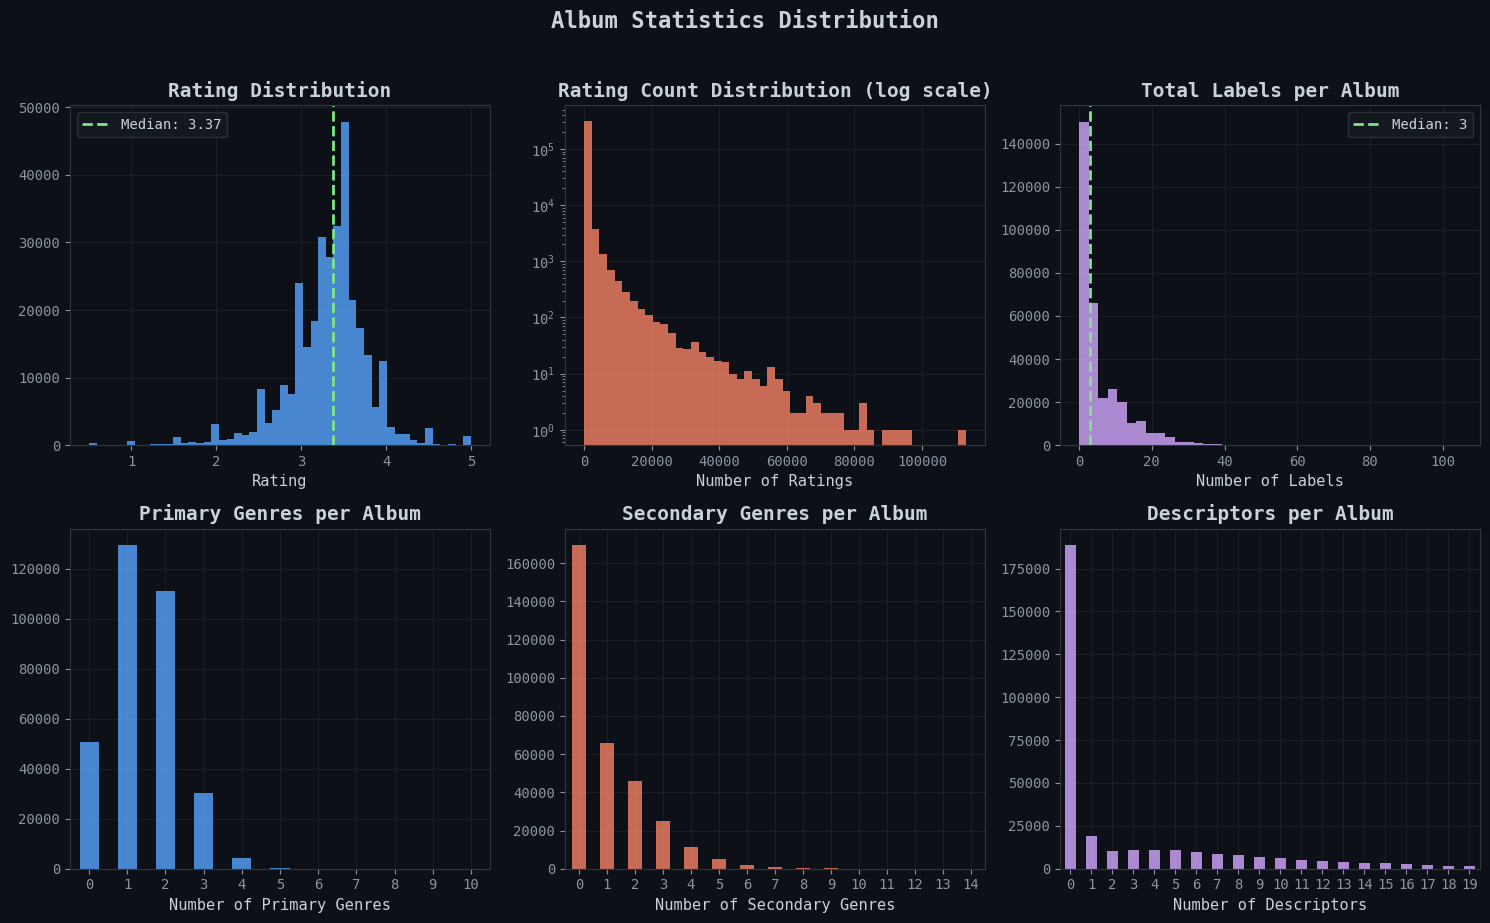

In [15]:
# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Album Statistics Distribution', fontsize=16, fontweight='bold', y=1.02)

# Rating distribution
ax = axes[0, 0]
df[df['rating'] > 0]['rating'].hist(bins=50, ax=ax, color=COLORS['primary'], edgecolor='none', alpha=0.8)
ax.axvline(df[df['rating'] > 0]['rating'].median(), color=COLORS['accent1'], linestyle='--', linewidth=2, label=f"Median: {df[df['rating'] > 0]['rating'].median():.2f}")
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.legend()

# Rating count (log scale)
ax = axes[0, 1]
df[df['rating_count'] > 0]['rating_count'].hist(bins=50, ax=ax, color=COLORS['secondary'], edgecolor='none', alpha=0.8)
ax.set_yscale('log')
ax.set_title('Rating Count Distribution (log scale)')
ax.set_xlabel('Number of Ratings')

# Labels per album
ax = axes[0, 2]
df['total_labels'].hist(bins=40, ax=ax, color=COLORS['accent2'], edgecolor='none', alpha=0.8)
ax.axvline(df['total_labels'].median(), color=COLORS['accent1'], linestyle='--', linewidth=2, label=f"Median: {df['total_labels'].median():.0f}")
ax.set_title('Total Labels per Album')
ax.set_xlabel('Number of Labels')
ax.legend()

# Genre counts
ax = axes[1, 0]
df['n_primary_genres'].value_counts().sort_index().head(15).plot(kind='bar', ax=ax, color=COLORS['primary'], edgecolor='none', alpha=0.8)
ax.set_title('Primary Genres per Album')
ax.set_xlabel('Number of Primary Genres')
ax.tick_params(axis='x', rotation=0)

# Secondary genre counts
ax = axes[1, 1]
df['n_secondary_genres'].value_counts().sort_index().head(15).plot(kind='bar', ax=ax, color=COLORS['secondary'], edgecolor='none', alpha=0.8)
ax.set_title('Secondary Genres per Album')
ax.set_xlabel('Number of Secondary Genres')
ax.tick_params(axis='x', rotation=0)

# Descriptor counts
ax = axes[1, 2]
df['n_descriptors'].value_counts().sort_index().head(20).plot(kind='bar', ax=ax, color=COLORS['accent2'], edgecolor='none', alpha=0.8)
ax.set_title('Descriptors per Album')
ax.set_xlabel('Number of Descriptors')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


## 3. Genre Analysis


In [20]:
# Collect all genres
all_primary = [g for genres in df['primary_genres'] for g in genres]
all_secondary = [g for genres in df['secondary_genres'] for g in genres]
all_genres = all_primary + all_secondary

primary_counts = Counter(all_primary)
secondary_counts = Counter(all_secondary)
genre_counts = Counter(all_genres)

print(f"Unique primary genres: {len(primary_counts):,}")
print(f"Unique secondary genres: {len(secondary_counts):,}")
print(f"Unique genres (combined): {len(genre_counts):,}")
print(f"\nTotal primary genre assignments: {len(all_primary):,}")
print(f"Total secondary genre assignments: {len(all_secondary):,}")


Unique primary genres: 2,380
Unique secondary genres: 2,068
Unique genres (combined): 2,431

Total primary genre assignments: 461,230
Total secondary genre assignments: 325,382


In [21]:
# Top 30 genres
top_genres = genre_counts.most_common(30)
print("Top 30 Genres:")
for i, (genre, count) in enumerate(top_genres, 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {genre:30s} {count:6,} ({pct:5.1f}%)")


Top 30 Genres:
   1. Trap                           12,473 (  3.8%)
   2. Ambient                        10,711 (  3.3%)
   3. Singer-Songwriter              10,332 (  3.2%)
   4. Pop Rock                       10,113 (  3.1%)
   5. Hard Rock                       7,533 (  2.3%)
   6. Modern Classical                7,453 (  2.3%)
   7. Indie Rock                      7,405 (  2.3%)
   8. Post-Punk                       7,372 (  2.3%)
   9. Alternative Rock                7,125 (  2.2%)
  10. Pop Rap                         7,046 (  2.2%)
  11. Progressive Rock                6,987 (  2.1%)
  12. Cloud Rap                       6,509 (  2.0%)
  13. Drone                           6,391 (  2.0%)
  14. Synthpop                        6,209 (  1.9%)
  15. Art Pop                         6,133 (  1.9%)
  16. Indie Pop                       5,967 (  1.8%)
  17. Southern Hip Hop                5,683 (  1.7%)
  18. Psychedelic Rock                5,552 (  1.7%)
  19. Experimental Hip Hop     

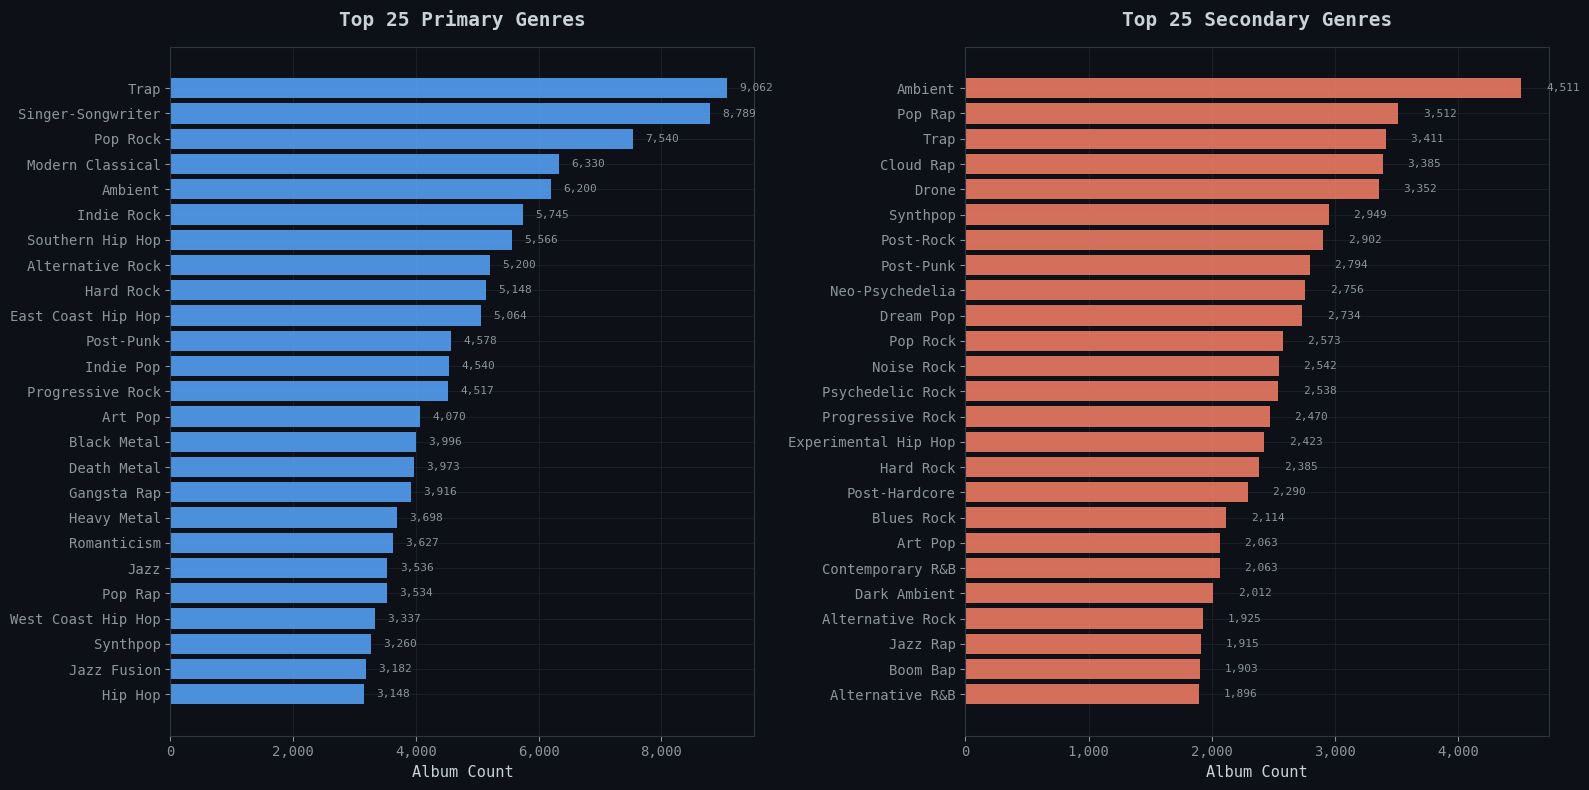

In [22]:
# Visualize top genres
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 25 primary genres
ax = axes[0]
top_primary = primary_counts.most_common(25)
genres, counts = zip(*top_primary)
y_pos = np.arange(len(genres))
bars = ax.barh(y_pos, counts, color=COLORS['primary'], edgecolor='none', alpha=0.85)
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.invert_yaxis()
ax.set_xlabel('Album Count')
ax.set_title('Top 25 Primary Genres', pad=15)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add count labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
            f'{count:,}', va='center', fontsize=8, color=COLORS['muted'])

# Top 25 secondary genres
ax = axes[1]
top_secondary = secondary_counts.most_common(25)
genres, counts = zip(*top_secondary)
y_pos = np.arange(len(genres))
bars = ax.barh(y_pos, counts, color=COLORS['secondary'], edgecolor='none', alpha=0.85)
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.invert_yaxis()
ax.set_xlabel('Album Count')
ax.set_title('Top 25 Secondary Genres', pad=15)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
            f'{count:,}', va='center', fontsize=8, color=COLORS['muted'])

plt.tight_layout()
plt.show()


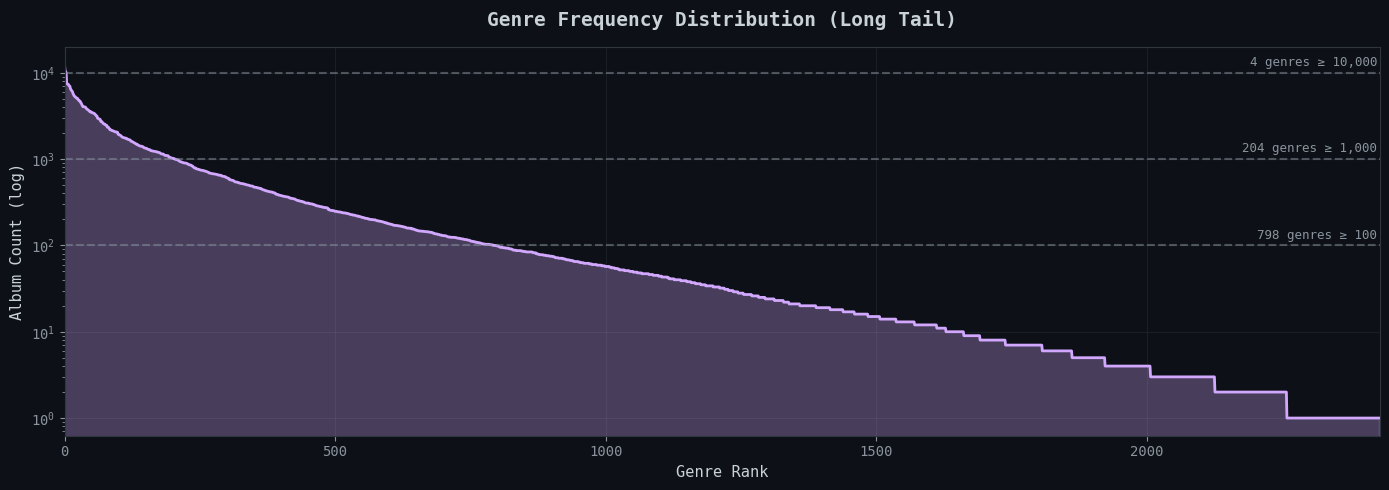

In [19]:
# Genre frequency distribution (long tail analysis)
fig, ax = plt.subplots(figsize=(14, 5))

sorted_counts = sorted(genre_counts.values(), reverse=True)
ax.semilogy(range(len(sorted_counts)), sorted_counts, color=COLORS['accent2'], linewidth=2)
ax.fill_between(range(len(sorted_counts)), sorted_counts, alpha=0.3, color=COLORS['accent2'])

# Mark thresholds
thresholds = [100, 1000, 10000]
for thresh in thresholds:
    genres_above = sum(1 for c in sorted_counts if c >= thresh)
    ax.axhline(thresh, color=COLORS['muted'], linestyle='--', alpha=0.5)
    ax.text(len(sorted_counts) - 5, thresh * 1.2, f'{genres_above} genres ≥ {thresh:,}',
            ha='right', fontsize=9, color=COLORS['muted'])

ax.set_xlabel('Genre Rank')
ax.set_ylabel('Album Count (log)')
ax.set_title('Genre Frequency Distribution (Long Tail)', pad=15)
ax.set_xlim(0, len(sorted_counts))

plt.tight_layout()
plt.show()


## 4. Descriptor Analysis


In [27]:
# Collect all descriptors
all_descriptors = [d for descs in df['descriptors'] for d in descs]
descriptor_counts = Counter(all_descriptors)

print(f"Unique descriptors: {len(descriptor_counts):,}")
print(f"Total descriptor assignments: {len(all_descriptors):,}")
print(f"Avg descriptors per album: {len(all_descriptors) / len(df):.1f}")


Unique descriptors: 309
Total descriptor assignments: 1,058,890
Avg descriptors per album: 3.2


In [24]:
# Top 50 descriptors
top_descriptors = descriptor_counts.most_common(50)
print("Top 50 Descriptors:")
for i, (desc, count) in enumerate(top_descriptors, 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {desc:30s} {count:6,} ({pct:5.1f}%)")


Top 50 Descriptors:
   1. male vocalist                  64,938 ( 19.9%)
   2. melodic                        37,665 ( 11.6%)
   3. rhythmic                       33,851 ( 10.4%)
   4. energetic                      30,647 (  9.4%)
   5. atmospheric                    28,180 (  8.6%)
   6. female vocalist                25,893 (  7.9%)
   7. instrumental                   21,669 (  6.6%)
   8. dark                           18,177 (  5.6%)
   9. passionate                     18,018 (  5.5%)
  10. melancholic                    17,031 (  5.2%)
  11. playful                        16,658 (  5.1%)
  12. heavy                          15,728 (  4.8%)
  13. warm                           14,938 (  4.6%)
  14. aggressive                     14,735 (  4.5%)
  15. mellow                         14,686 (  4.5%)
  16. psychedelic                    14,656 (  4.5%)
  17. nocturnal                      14,545 (  4.5%)
  18. raw                            13,175 (  4.0%)
  19. bittersweet         

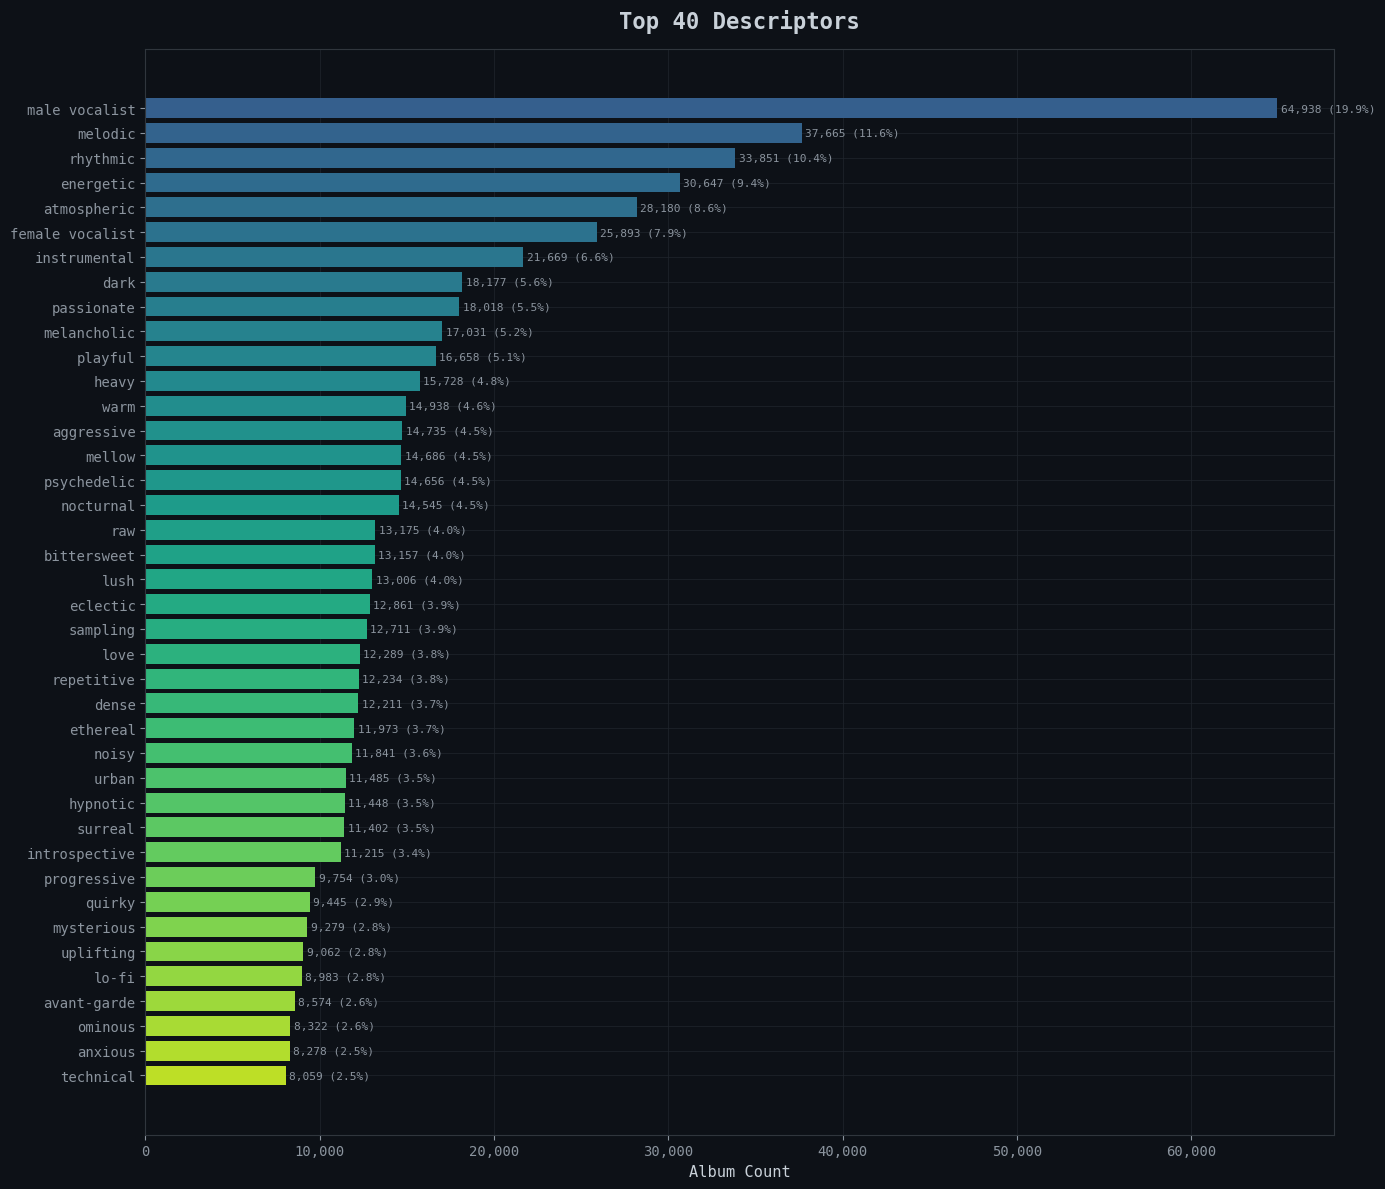

In [25]:
# Visualize top descriptors
fig, ax = plt.subplots(figsize=(14, 12))

top_40 = descriptor_counts.most_common(40)
descs, counts = zip(*top_40)
y_pos = np.arange(len(descs))

# Color by frequency (gradient)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(descs)))
bars = ax.barh(y_pos, counts, color=colors, edgecolor='none')

ax.set_yticks(y_pos)
ax.set_yticklabels(descs)
ax.invert_yaxis()
ax.set_xlabel('Album Count')
ax.set_title('Top 40 Descriptors', pad=15, fontsize=16)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add count labels
for bar, count in zip(bars, counts):
    pct = count / len(df) * 100
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
            f'{count:,} ({pct:.1f}%)', va='center', fontsize=8, color=COLORS['muted'])

plt.tight_layout()
plt.show()


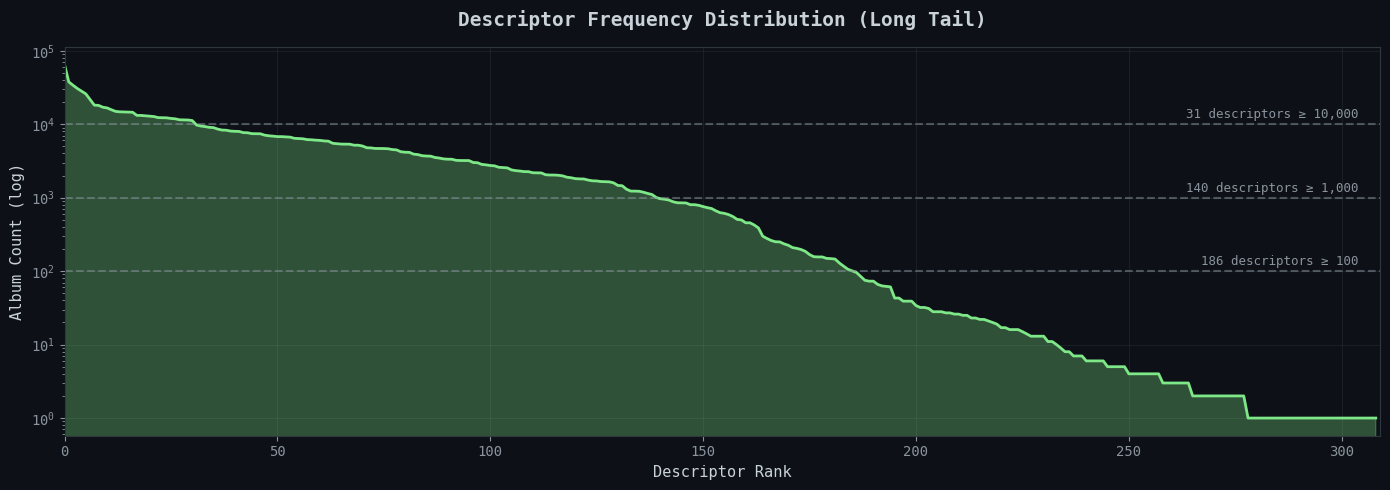

In [26]:
# Descriptor frequency distribution
fig, ax = plt.subplots(figsize=(14, 5))

sorted_desc_counts = sorted(descriptor_counts.values(), reverse=True)
ax.semilogy(range(len(sorted_desc_counts)), sorted_desc_counts, color=COLORS['accent1'], linewidth=2)
ax.fill_between(range(len(sorted_desc_counts)), sorted_desc_counts, alpha=0.3, color=COLORS['accent1'])

thresholds = [100, 1000, 10000]
for thresh in thresholds:
    descs_above = sum(1 for c in sorted_desc_counts if c >= thresh)
    ax.axhline(thresh, color=COLORS['muted'], linestyle='--', alpha=0.5)
    ax.text(len(sorted_desc_counts) - 5, thresh * 1.2, f'{descs_above} descriptors ≥ {thresh:,}',
            ha='right', fontsize=9, color=COLORS['muted'])

ax.set_xlabel('Descriptor Rank')
ax.set_ylabel('Album Count (log)')
ax.set_title('Descriptor Frequency Distribution (Long Tail)', pad=15)
ax.set_xlim(0, len(sorted_desc_counts))

plt.tight_layout()
plt.show()


## 5. Label Coverage Analysis

For ML training, we need sufficient examples of each label. Let's analyze coverage at different thresholds.


In [28]:
# Coverage analysis
def coverage_stats(counts, thresholds=[10, 50, 100, 500, 1000]):
    total = len(counts)
    print(f"Total unique labels: {total:,}")
    print(f"\nLabels by minimum occurrence threshold:")
    for thresh in thresholds:
        n_above = sum(1 for c in counts.values() if c >= thresh)
        albums_covered = sum(c for c in counts.values() if c >= thresh)
        print(f"  ≥{thresh:5,}: {n_above:4,} labels ({n_above/total*100:5.1f}%) — {albums_covered:,} assignments")

print("=== GENRES ===")
coverage_stats(genre_counts)

print("\n=== DESCRIPTORS ===")
coverage_stats(descriptor_counts)


=== GENRES ===
Total unique labels: 2,431

Labels by minimum occurrence threshold:
  ≥   10: 1,662 labels ( 68.4%) — 783,724 assignments
  ≥   50: 1,051 labels ( 43.2%) — 768,949 assignments
  ≥  100:  798 labels ( 32.8%) — 750,989 assignments
  ≥  500:  340 labels ( 14.0%) — 645,687 assignments
  ≥1,000:  204 labels (  8.4%) — 549,531 assignments

=== DESCRIPTORS ===
Total unique labels: 309

Labels by minimum occurrence threshold:
  ≥   10:  234 labels ( 75.7%) — 1,058,679 assignments
  ≥   50:  195 labels ( 63.1%) — 1,057,762 assignments
  ≥  100:  186 labels ( 60.2%) — 1,057,108 assignments
  ≥  500:  159 labels ( 51.5%) — 1,050,761 assignments
  ≥1,000:  140 labels ( 45.3%) — 1,036,361 assignments


In [29]:
# Albums with sufficient labels for training
MIN_LABELS = 100  # Minimum occurrences for a label to be "trainable"

trainable_genres = {g for g, c in genre_counts.items() if c >= MIN_LABELS}
trainable_descriptors = {d for d, c in descriptor_counts.items() if c >= MIN_LABELS}

def count_trainable(row):
    genres = set(row['primary_genres']) | set(row['secondary_genres'])
    descs = set(row['descriptors'])
    return len(genres & trainable_genres) + len(descs & trainable_descriptors)

df['trainable_labels'] = df.apply(count_trainable, axis=1)

print(f"Trainable labels (≥{MIN_LABELS} occurrences):")
print(f"  Genres: {len(trainable_genres):,}")
print(f"  Descriptors: {len(trainable_descriptors):,}")
print(f"  Total: {len(trainable_genres) + len(trainable_descriptors):,}")
print(f"\nAlbums with at least 1 trainable label: {(df['trainable_labels'] > 0).sum():,} ({(df['trainable_labels'] > 0).mean()*100:.1f}%)")
print(f"Albums with at least 5 trainable labels: {(df['trainable_labels'] >= 5).sum():,} ({(df['trainable_labels'] >= 5).mean()*100:.1f}%)")
print(f"Avg trainable labels per album: {df['trainable_labels'].mean():.1f}")


Trainable labels (≥100 occurrences):
  Genres: 798
  Descriptors: 186
  Total: 984

Albums with at least 1 trainable label: 271,861 (83.4%)
Albums with at least 5 trainable labels: 121,326 (37.2%)
Avg trainable labels per album: 5.5


## 6. Artist Analysis


In [30]:
# Extract artist names
all_artists = [a['name'] for artists in df['artists'] for a in artists]
artist_counts = Counter(all_artists)

print(f"Unique artists: {len(artist_counts):,}")
print(f"\nTop 20 artists by album count:")
for i, (artist, count) in enumerate(artist_counts.most_common(20), 1):
    print(f"  {i:2d}. {artist:35s} {count:4,} albums")


Unique artists: 105,497

Top 20 artists by album count:
   1. Various Artists                     1,171 albums
   2. London Symphony Orchestra            374 albums
   3. Berliner Philharmoniker              285 albums
   4. Philharmonia Orchestra               277 albums
   5. Wiener Philharmoniker                224 albums
   6. Herbert von Karajan                  171 albums
   7. London Philharmonic Orchestra        164 albums
   8. Chicago Symphony Orchestra           139 albums
   9. Academy of St Martin in the Fields   132 albums
  10. The Philadelphia Orchestra           130 albums
  11. Gucci Mane                           130 albums
  12. English Chamber Orchestra            128 albums
  13. Dietrich Fischer-Dieskau             127 albums
  14. Viper                                126 albums
  15. Deutsches Symphonie-Orchester Berlin  121 albums
  16. Orchestre national de France         120 albums
  17. BBC Symphony Orchestra               114 albums
  18. New York Philharmo

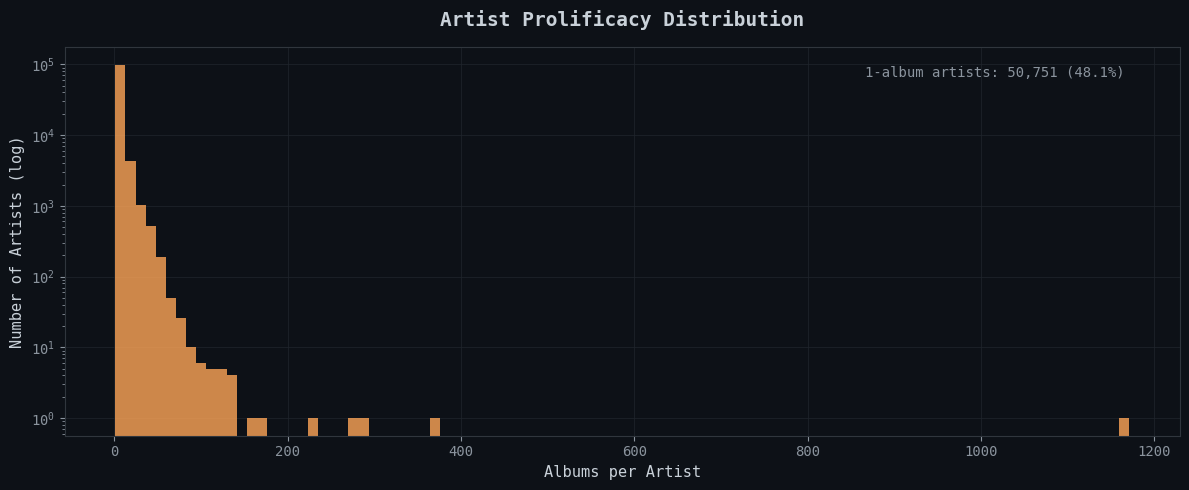

In [31]:
# Artist prolificacy distribution
fig, ax = plt.subplots(figsize=(12, 5))

albums_per_artist = pd.Series(artist_counts)
ax.hist(albums_per_artist, bins=100, color=COLORS['accent3'], edgecolor='none', alpha=0.8)
ax.set_yscale('log')
ax.set_xlabel('Albums per Artist')
ax.set_ylabel('Number of Artists (log)')
ax.set_title('Artist Prolificacy Distribution', pad=15)

# Add stats
one_album = (albums_per_artist == 1).sum()
ax.text(0.95, 0.95, f'1-album artists: {one_album:,} ({one_album/len(artist_counts)*100:.1f}%)',
        transform=ax.transAxes, ha='right', va='top', fontsize=10, color=COLORS['muted'])

plt.tight_layout()
plt.show()


## 7. Rating Analysis


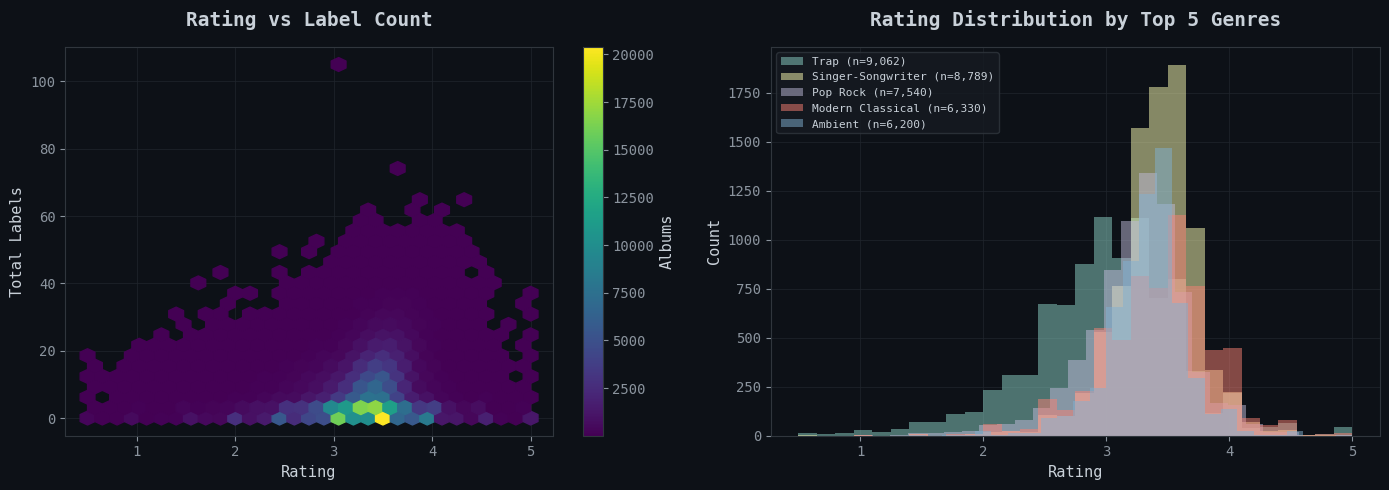

In [32]:
# Ratings vs label richness
rated_df = df[df['rating'] > 0].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rating vs total labels
ax = axes[0]
ax.hexbin(rated_df['rating'], rated_df['total_labels'], gridsize=30, cmap='viridis', mincnt=1)
ax.set_xlabel('Rating')
ax.set_ylabel('Total Labels')
ax.set_title('Rating vs Label Count', pad=15)
plt.colorbar(ax.collections[0], ax=ax, label='Albums')

# Rating distribution by genre (top genres)
ax = axes[1]
top_5_genres = [g for g, _ in primary_counts.most_common(5)]
for i, genre in enumerate(top_5_genres):
    mask = rated_df['primary_genres'].apply(lambda x: genre in x)
    ratings = rated_df.loc[mask, 'rating']
    ax.hist(ratings, bins=30, alpha=0.5, label=f'{genre} (n={len(ratings):,})')

ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Rating Distribution by Top 5 Genres', pad=15)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


In [33]:
# Highest rated albums
top_rated = df.nlargest(20, 'rating')[['name', 'artists', 'rating', 'rating_count', 'primary_genres']].copy()
top_rated['artist_names'] = top_rated['artists'].apply(lambda x: ', '.join(a['name'] for a in x[:2]))
print("Top 20 Highest Rated Albums:")
for i, row in enumerate(top_rated.itertuples(), 1):
    print(f"  {i:2d}. {row.rating:.2f} ({row.rating_count:,}) — {row.artist_names}: {row.name}")
    print(f"      Genres: {row.primary_genres[:3]}")


Top 20 Highest Rated Albums:
   1. 5.00 (1) — 2NP: Bazar styli
      Genres: []
   2. 5.00 (2) — 80kidz: This Is My Works
      Genres: []
   3. 5.00 (1) — israel.209: Stuck Ina Cold
      Genres: []
   4. 5.00 (1) — A Cor do Som: 40 anos
      Genres: []
   5. 5.00 (1) — A.K. Klosowski: Echoplex
      Genres: []
   6. 5.00 (1) — Aaron Choulai: 16-bit Nocturnes
      Genres: []
   7. 5.00 (1) — Aaron Copland: Appalachian Spring (Decca - Dorati)
      Genres: []
   8. 5.00 (1) — Abida Parveen: Bina-E-Saz-E-Nava
      Genres: []
   9. 5.00 (1) — Abida Parveen: Mann Quntu Maula, Vol. 1
      Genres: []
  10. 5.00 (1) — Abida Parveen: Sufiyana
      Genres: []
  11. 5.00 (1) — Academy of St Martin in the Fields, Michala Petri: I 6 concerti per flauto op. 10
      Genres: []
  12. 5.00 (1) — Academy of St Martin in the Fields, Helen Watts: Magnificat
      Genres: ['Baroque Music' 'Choral' 'Christian Liturgical Music']
  13. 5.00 (3) — Academy of St Martin in the Fields, Neville Marriner: V

## 8. Track Analysis


In [ ]:
# Track statistics
track_counts = df['n_tracks']
total_tracks = track_counts.sum()

print(f"Total tracks: {total_tracks:,}")
print(f"Avg tracks per album: {track_counts.mean():.1f}")
print(f"Median tracks per album: {track_counts.median():.0f}")
print(f"Max tracks on an album: {track_counts.max()}")


In [34]:
# Track duration analysis (if available)
all_durations = []
for tracks in df['tracks']:
    for t in tracks:
        if t.get('duration_seconds'):
            all_durations.append(t['duration_seconds'])

if all_durations:
    durations = np.array(all_durations)
    print(f"Tracks with duration data: {len(durations):,}")
    print(f"Avg track duration: {durations.mean()/60:.1f} min")
    print(f"Median track duration: {np.median(durations)/60:.1f} min")

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.hist(durations / 60, bins=100, range=(0, 15), color=COLORS['primary'], edgecolor='none', alpha=0.8)
    ax.axvline(np.median(durations)/60, color=COLORS['accent1'], linestyle='--', linewidth=2, label=f'Median: {np.median(durations)/60:.1f} min')
    ax.set_xlabel('Duration (minutes)')
    ax.set_ylabel('Track Count')
    ax.set_title('Track Duration Distribution', pad=15)
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No track duration data available")


No track duration data available


## 9. Spotify ID Coverage


In [35]:
# Spotify coverage
has_spotify = df['spotify_id'].notna()
print(f"Albums with Spotify ID: {has_spotify.sum():,} ({has_spotify.mean()*100:.1f}%)")
print(f"Albums without Spotify ID: {(~has_spotify).sum():,}")

# Compare label coverage
print(f"\nAvg labels (with Spotify): {df.loc[has_spotify, 'total_labels'].mean():.1f}")
print(f"Avg labels (no Spotify): {df.loc[~has_spotify, 'total_labels'].mean():.1f}")


Albums with Spotify ID: 141,047 (43.3%)
Albums without Spotify ID: 184,843

Avg labels (with Spotify): 9.3
Avg labels (no Spotify): 2.9


## 10. Summary & Next Steps


In [36]:
# Final summary
print("="*60)
print("LUTE DATA SUMMARY")
print("="*60)
print(f"\n📀 Albums: {len(df):,}")
print(f"🎵 Total tracks: {df['n_tracks'].sum():,}")
print(f"🎤 Unique artists: {len(artist_counts):,}")
print(f"\n🏷️  LABELS:")
print(f"   Unique genres: {len(genre_counts):,}")
print(f"   Unique descriptors: {len(descriptor_counts):,}")
print(f"   Total unique labels: {len(genre_counts) + len(descriptor_counts):,}")
print(f"\n📊 TRAINABLE LABELS (≥{MIN_LABELS} examples):")
print(f"   Genres: {len(trainable_genres):,}")
print(f"   Descriptors: {len(trainable_descriptors):,}")
print(f"   Total: {len(trainable_genres) + len(trainable_descriptors):,}")
print(f"\n🎯 COVERAGE:")
print(f"   Albums with ratings: {(df['rating'] > 0).mean()*100:.1f}%")
print(f"   Albums with Spotify: {df['spotify_id'].notna().mean()*100:.1f}%")
print(f"   Avg labels per album: {df['total_labels'].mean():.1f}")
print("="*60)


LUTE DATA SUMMARY

📀 Albums: 325,890
🎵 Total tracks: 679,886
🎤 Unique artists: 105,497

🏷️  LABELS:
   Unique genres: 2,431
   Unique descriptors: 309
   Total unique labels: 2,740

📊 TRAINABLE LABELS (≥100 examples):
   Genres: 798
   Descriptors: 186
   Total: 984

🎯 COVERAGE:
   Albums with ratings: 100.0%
   Albums with Spotify: 43.3%
   Avg labels per album: 5.7


In [ ]:
# Export trainable label vocabularies for future use
output_dir = Path('../data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

# Save label vocabularies as JSON
import json

vocab = {
    'genres': sorted(trainable_genres),
    'descriptors': sorted(trainable_descriptors),
    'threshold': MIN_LABELS,
    'stats': {
        'total_albums': len(df),
        'total_genres': len(genre_counts),
        'total_descriptors': len(descriptor_counts),
        'trainable_genres': len(trainable_genres),
        'trainable_descriptors': len(trainable_descriptors),
    }
}

vocab_path = output_dir / 'label_vocabulary.json'
with open(vocab_path, 'w') as f:
    json.dump(vocab, f, indent=2)

print(f"Saved label vocabulary to: {vocab_path}")
print(f"  {len(vocab['genres'])} genres + {len(vocab['descriptors'])} descriptors = {len(vocab['genres']) + len(vocab['descriptors'])} total labels")


## Key Findings

### Data Quality

| Metric | Value | Implication |
|--------|-------|-------------|
| Albums with descriptors | 42% | ~188K albums lack primary training signal |
| Albums with Spotify ID | 43% | Limits audio acquisition to ~141K albums |
| Albums with track listings | 20% | Most albums lack track-level metadata |
| Track duration data | 0% | Cannot filter by song length |

**Critical insight**: Albums with Spotify IDs have **3x richer labels** (9.3 avg vs 2.9). Well-documented RYM albums tend to have both Spotify links AND descriptors. The **intersection of Spotify + descriptors** is the sweet spot for training data.

### Label Distribution

**Genres (2,431 unique):**
- Classic long-tail distribution
- Top genre (Trap) only covers 3.8%
- 204 genres have ≥1,000 examples
- ~1,600 genres are rare (<100 examples)

**Descriptors (309 unique):**
- More concentrated distribution
- "male vocalist" appears in 20% of albums
- Most descriptors have sufficient examples
- Better suited for ML than rare genres

### Model Architecture Implications

**Use a single multi-label model** for both genres AND descriptors:

```
Audio → [Encoder] → [Shared Features] → [Head] → [984 outputs]
                                                   ├── 798 genres
                                                   └── 186 descriptors
```

**Why shared representation works:**
- Audio features for "atmospheric" inform both "ambient" (genre) and "ethereal" (descriptor)
- Multi-task learning — genres and descriptors provide complementary supervision
- Single forward pass is more efficient than separate models

### Training Subset Recommendation

Filter to albums that have:
1. ✅ Spotify ID (for audio acquisition)
2. ✅ At least 3 descriptors (meaningful labels)
3. ✅ At least 1 primary genre

This yields a **high-quality subset of ~60-80K albums** with rich labels and audio availability.

### Open Questions

- [ ] Should classical music be included? (Different audio characteristics, dominates top artists)
- [ ] Optimal label threshold — 100 vs 500 vs 1000?
- [ ] How to handle label imbalance for rare genres?


In [38]:
# Validate training subset size
training_subset = df[
    (df['spotify_id'].notna()) &
    (df['n_descriptors'] >= 3) &
    (df['n_primary_genres'] >= 1)
]

print("Training Subset Analysis:")
print(f"  Albums meeting criteria: {len(training_subset):,} ({len(training_subset)/len(df)*100:.1f}%)")
print(f"  Avg labels per album: {training_subset['total_labels'].mean():.1f}")
print(f"  Avg trainable labels: {training_subset['trainable_labels'].mean():.1f}")
print(f"\n  Unique artists: {training_subset['artists'].apply(lambda x: x[0]['name'] if len(x) > 0 else None).nunique():,}")


Training Subset Analysis:
  Albums meeting criteria: 82,415 (25.3%)
  Avg labels per album: 14.0
  Avg trainable labels: 13.7

  Unique artists: 31,643


### Next Steps

1. **Filter training subset** — Keep albums with Spotify ID + ≥3 descriptors + ≥1 genre
2. **Audio acquisition** — Use Spotify IDs to obtain 30-second previews or full tracks
3. **Label encoding** — Create multi-hot vectors: 798 genres + 186 descriptors = 984 outputs
4. **Feature extraction** — Extract mel spectrograms (128 bins, 16kHz)
5. **Train/val/test splits** — Stratified by primary genre to maintain distribution
6. **Model training** — Single multi-label classifier for genres + descriptors jointly
7. **Evaluation** — Per-label precision/recall, macro F1, handle class imbalance
